In [2]:
import pandas as pd
import plotly
import plotly.express as ex
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [3]:
netflix_data = pd.read_csv('netflix_content_2023.csv')
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [4]:
netflix_data.info()
## notice hours viewed is object, change to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [7]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',', '',regex= True).astype(float)

netflix_data[['Title','Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


In [8]:
netflix_data[['Title','Hours Viewed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         24812 non-null  object 
 1   Hours Viewed  24812 non-null  float64
dtypes: float64(1), object(1)
memory usage: 387.8+ KB


Hours are now converted to Numberic format, next lets find out which type of content dominates ( Shows or Movies) via bar chart

In [9]:
## group data of hours played based on content type 
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()
content_type_viewership

Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64

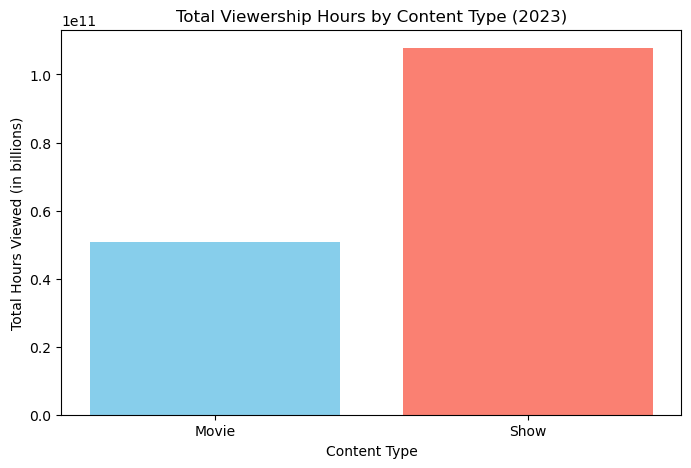

In [12]:
import matplotlib.pyplot as plt

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(content_type_viewership.index, content_type_viewership.values, color=['skyblue', 'salmon'])

# Set titles and labels
ax.set_title('Total Viewership Hours by Content Type (2023)')
ax.set_xlabel('Content Type')
ax.set_ylabel('Total Hours Viewed (in billions)')

# Display the plot
plt.show()

The `shows` are dominating Netflix content for 2023

In [13]:
## Next lets check cases based on language

language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)
language_viewership

Language Indicator
English        1.244417e+11
Korean         1.537840e+10
Non-English    1.043910e+10
Japanese       7.102000e+09
Hindi          9.261000e+08
Russian        1.146000e+08
Name: Hours Viewed, dtype: float64

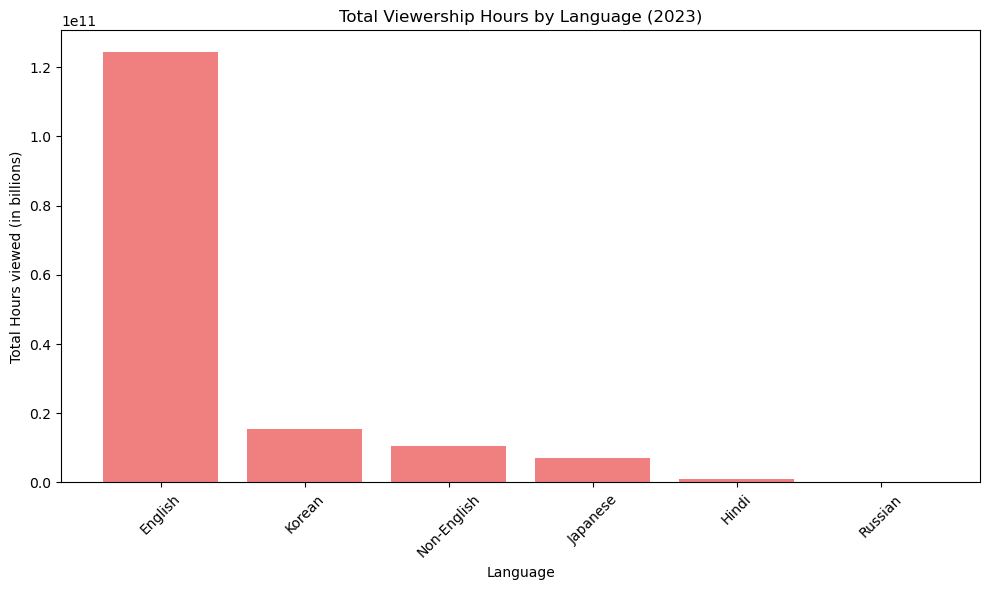

In [14]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(language_viewership.index, language_viewership.values, color='lightcoral')

# Set titles and labels
ax.set_title('Total Viewership Hours by Language (2023)')
ax.set_xlabel('Language')
ax.set_ylabel('Total Hours viewed (in billions)')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

`English` Language dominates the list, followed by Korean with near 16Billion watch hours

In [15]:
## Now lets focus on how relesae datas has affected viwership over time in Trend

# lets convert release date to datetime format and extract month from it

netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month']= netflix_data['Release Date'].dt.month

## lets aggregrate viewership based on release month

monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()
monthly_viewership

Release Month
1.0     7.271600e+09
2.0     7.103700e+09
3.0     7.437100e+09
4.0     6.865700e+09
5.0     7.094600e+09
6.0     8.522000e+09
7.0     6.524800e+09
8.0     6.817800e+09
9.0     7.262200e+09
10.0    8.123200e+09
11.0    7.749500e+09
12.0    1.005580e+10
Name: Hours Viewed, dtype: float64

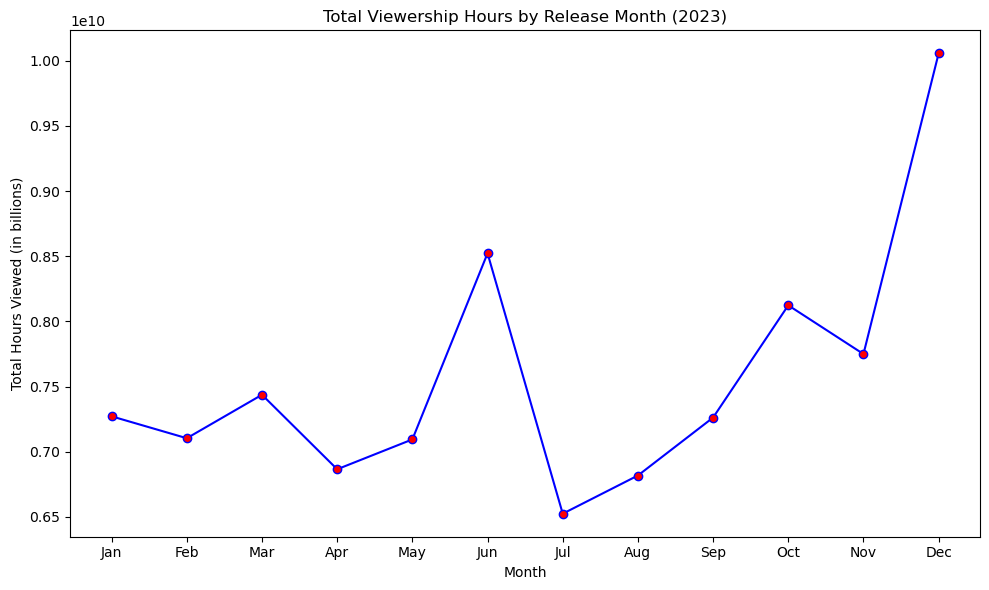

In [16]:
# Month names for x-axis labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_viewership.index, monthly_viewership.values, marker='o', color='blue', markerfacecolor='red')

# Set axis labels and title
ax.set_title('Total Viewership Hours by Release Month (2023)')
ax.set_xlabel('Month')
ax.set_ylabel('Total Hours Viewed (in billions)')

# Set custom ticks
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)

# Display the plot
plt.tight_layout()
plt.show()

We can find an increase in viewership during June and a sharp rise toward the end of the year in December.

Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

In [17]:
# extract the top 5 titles based on viewership hours
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')

top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


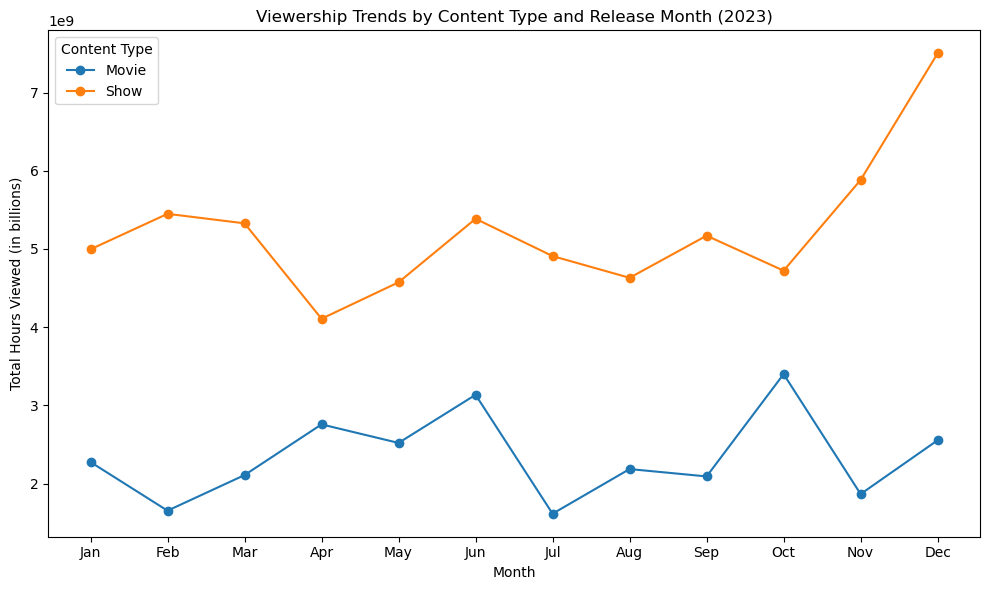

In [18]:
# Create the pivot table
monthly_viewership_by_type = netflix_data.pivot_table(
    index='Release Month',
    columns='Content Type',
    values='Hours Viewed',
    aggfunc='sum'
)

# Define month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))

for content_type in monthly_viewership_by_type.columns:
    ax.plot(
        monthly_viewership_by_type.index,
        monthly_viewership_by_type[content_type],
        marker='o',
        label=content_type
    )

# Set labels and title
ax.set_title('Viewership Trends by Content Type and Release Month (2023)')
ax.set_xlabel('Month')
ax.set_ylabel('Total Hours Viewed (in billions)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)
ax.legend(title='Content Type')

plt.tight_layout()
plt.show()

The graph compares viewership trends between movies and shows throughout 2023. It shows that shows consistently have higher viewership than movies, peaking in December. 

Now, let’s explore the total viewership hours distributed across different release seasons:

In [20]:
## lets get season based on month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 5, 5]:
        return 'Spring'
    
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
netflix_data['Release Season'] =  netflix_data['Release Month'].apply(get_season)
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()
print(seasonal_viewership)

# order the seasons
season_order= ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership.reindex(season_order)


Release Season
Fall      9.757450e+10
Spring    1.453170e+10
Summer    2.186460e+10
Winter    2.443110e+10
Name: Hours Viewed, dtype: float64


Release Season
Winter    2.443110e+10
Spring    1.453170e+10
Summer    2.186460e+10
Fall      9.757450e+10
Name: Hours Viewed, dtype: float64

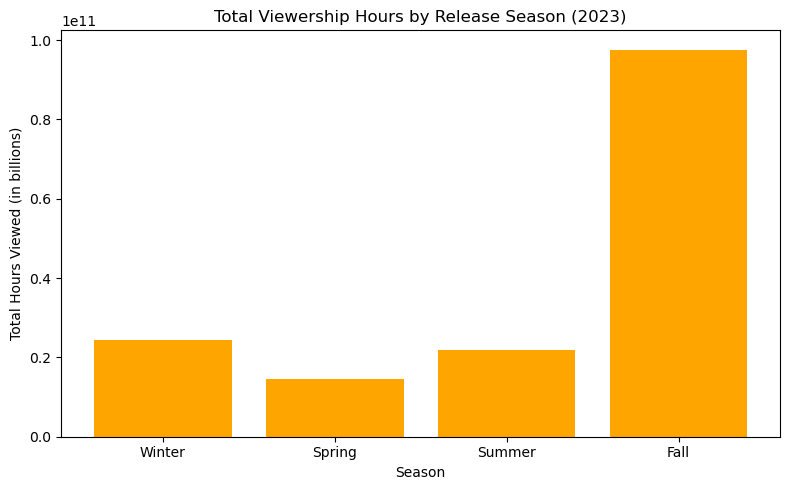

In [21]:
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Reorder data according to season_order
seasonal_viewership = seasonal_viewership.reindex(season_order)

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(seasonal_viewership.index, seasonal_viewership.values, color='orange')

# Set titles and labels
ax.set_title('Total Viewership Hours by Release Season (2023)')
ax.set_xlabel('Season')
ax.set_ylabel('Total Hours Viewed (in billions)')

plt.tight_layout()
plt.show()

The graph indicates that viewership hours peak significantly in the Fall season, with over 80 billion hours viewed, while Winter, Spring, and Summer each have relatively stable and similar viewership around the 20 billion mark.   
This suggests that Netflix experiences the highest audience engagement during the Fall

In [22]:
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()
monthly_releases

monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()
monthly_viewership

Release Month
1.0     7.271600e+09
2.0     7.103700e+09
3.0     7.437100e+09
4.0     6.865700e+09
5.0     7.094600e+09
6.0     8.522000e+09
7.0     6.524800e+09
8.0     6.817800e+09
9.0     7.262200e+09
10.0    8.123200e+09
11.0    7.749500e+09
12.0    1.005580e+10
Name: Hours Viewed, dtype: float64

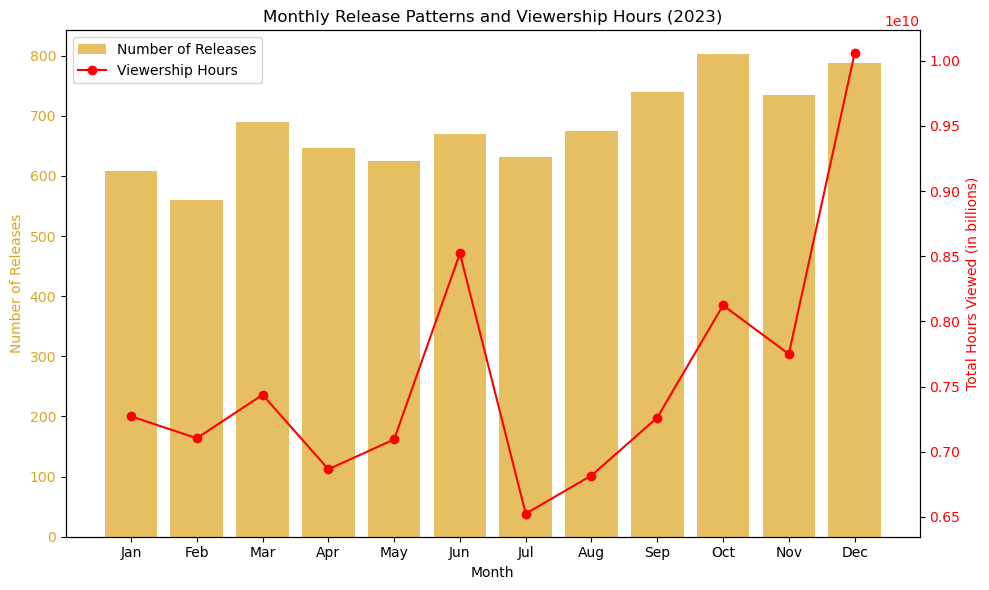

In [23]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set up the figure and both y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar chart for number of releases
bar = ax1.bar(monthly_releases.index, monthly_releases.values, color='goldenrod', alpha=0.7, label='Number of Releases')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Releases', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(month_labels)

# Create second y-axis for viewership
ax2 = ax1.twinx()
line = ax2.plot(monthly_viewership.index, monthly_viewership.values, color='red', marker='o', label='Viewership Hours')
ax2.set_ylabel('Total Hours Viewed (in billions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines_labels = [bar] + line
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

# Set title and layout
plt.title('Monthly Release Patterns and Viewership Hours (2023)')
plt.tight_layout()
plt.show()

While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months

Next, let’s explore whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns

In [24]:
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()
netflix_data

weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_releases

# aggregate viewership hours by day of the week
weekly_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekly_viewership

Release Day
Monday       3.954500e+09
Tuesday      5.562300e+09
Wednesday    1.574410e+10
Thursday     2.029280e+10
Friday       3.821720e+10
Saturday     5.121800e+09
Sunday       1.935300e+09
Name: Hours Viewed, dtype: float64

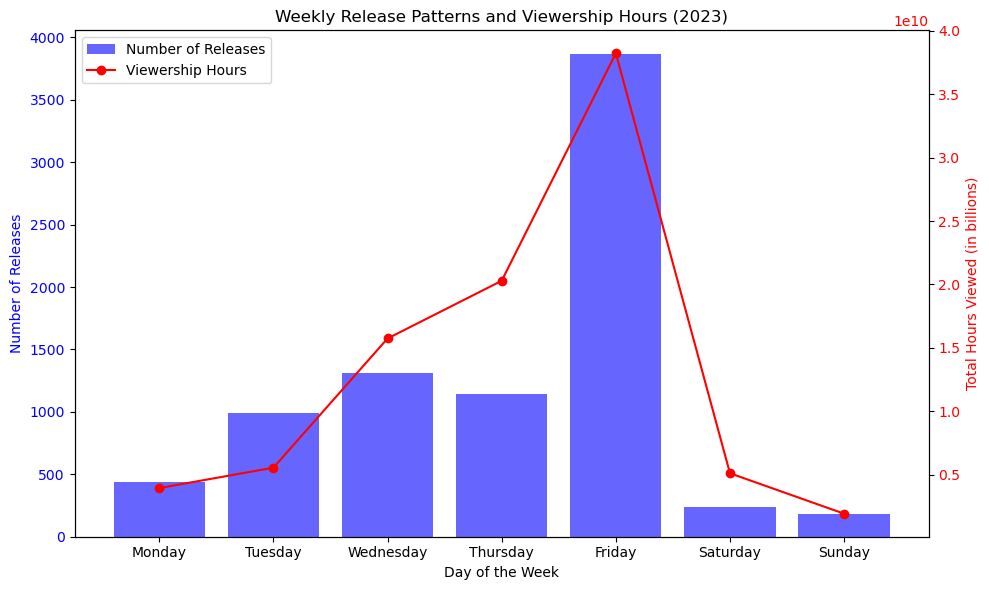

In [26]:
# Example data (replace with your actual Series)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Reorder by weekday
weekday_releases = weekday_releases.reindex(weekday_order)
weekly_viewership = weekly_viewership.reindex(weekday_order)

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for number of releases
bars = ax1.bar(weekday_order, weekday_releases.values, color='blue', alpha=0.6, label='Number of Releases')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Releases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for viewership
ax2 = ax1.twinx()
line = ax2.plot(weekday_order, weekly_viewership.values, color='red', marker='o', label='Viewership Hours')
ax2.set_ylabel('Total Hours Viewed (in billions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends
lines_labels = [bars] + line
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

# Title and layout
plt.title('Weekly Release Patterns and Viewership Hours (2023)')
plt.tight_layout()
plt.show()

The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

To further understand the strategy, let’s explore specific high-impact dates, such as holidays or major events, and their correlation with content releases

In [27]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datatime format
important_dates = pd.to_datetime(important_dates)
important_dates

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3,4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()
holiday_viewership

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


The data reveals that Netflix has strategically released content around key holidays and events. Some of the significant releases include:

- New Year’s Period: The Glory: Season 1, La Reina del Sur: Season 3, and Kaleidoscope: Limited Series were released close to New Year’s Day, resulting in high viewership.
- Valentine’s Day: Perfect Match: Season 1 and The Romantics: Limited Series were released on February 14th, which align with a romantic theme and capitalize on the holiday’s sentiment.